<a href="https://colab.research.google.com/github/meghana2343/ADS-Project/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving finaldataset.csv to finaldataset.csv


In [12]:
dataset = pd.read_csv("finaldataset.csv")


In [13]:
dataset.shape


(227, 6)

In [ ]:
#preprocessing data


In [14]:
dataset.isna().sum()

,0
Date,0
Close/Last,0
Volume,0
Open,0
High,0
Low,0


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        227 non-null    object
 1   Close/Last  227 non-null    object
 2   Volume      227 non-null    int64 
 3   Open        227 non-null    object
 4   High        227 non-null    object
 5   Low         227 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.8+ KB


In [16]:
#converting the 'Date' column into 'datetime' dtype
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [17]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        227 non-null    datetime64[ns]
 1   Close/Last  227 non-null    object        
 2   Volume      227 non-null    int64         
 3   Open        227 non-null    object        
 4   High        227 non-null    object        
 5   Low         227 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 10.8+ KB


In [18]:
#making the 'Date ' col as index
dataset.set_index('Date',inplace=True)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 227 entries, 2025-11-26 to 2025-01-02
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Close/Last  227 non-null    object
 1   Volume      227 non-null    int64 
 2   Open        227 non-null    object
 3   High        227 non-null    object
 4   Low         227 non-null    object
dtypes: int64(1), object(4)
memory usage: 10.6+ KB


In [20]:
dataset.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2025-11-26,$229.16,38497920,$230.74,$231.7474,$228.77
2025-11-25,$229.67,39379340,$226.38,$230.52,$223.80
2025-11-24,$226.28,54318400,$222.555,$227.33,$222.27
2025-11-21,$220.69,68490460,$216.345,$222.21,$215.18
2025-11-20,$217.14,50308960,$227.05,$227.41,$216.74


In [22]:
#sorting the indexes
dataset.sort_index(inplace=True)

In [23]:
# Remove $ and convert selected columns to numeric
cols = ['Close/Last', 'Open', 'High', 'Low']
for col in cols:
    dataset[col] = dataset[col].replace({r'\$': ''}, regex=True).astype(float)

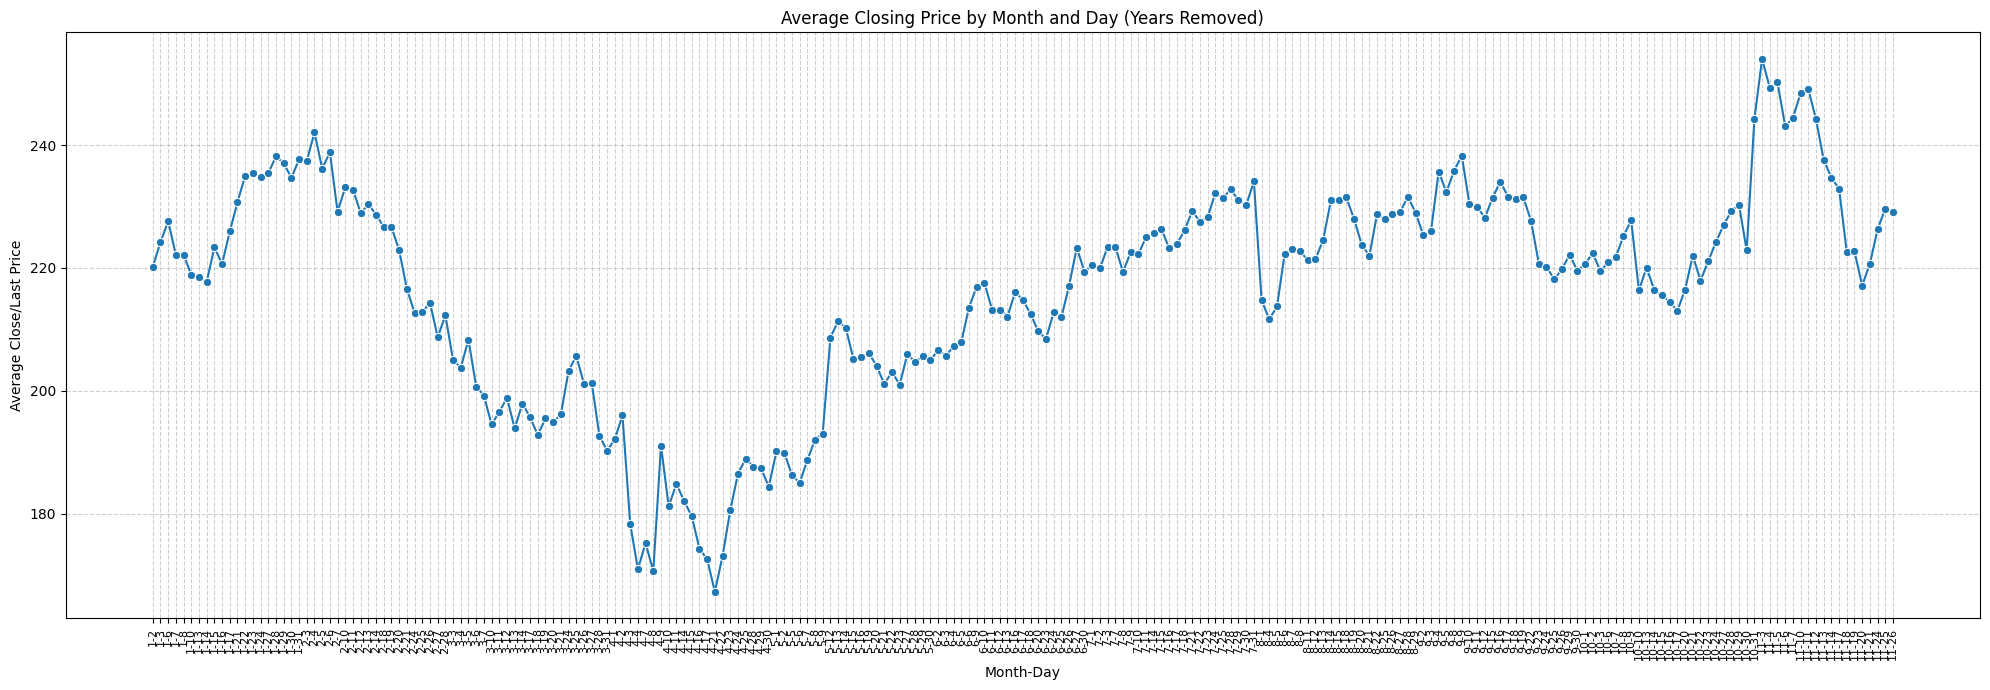

In [24]:
# Create 'Month' and 'Day' columns from the Date index
dataset['Month'] = dataset.index.month
dataset['Day'] = dataset.index.day

# Convert 'Close/Last' to numeric after removing '$'
dataset['Close/Last'] = dataset['Close/Last'].replace({r'\$': ''}, regex=True).astype(float)

# Group by Month and Day and calculate the mean of 'Close/Last'
daily_avg_price = dataset.groupby(['Month', 'Day'])['Close/Last'].mean().reset_index()

# Create a combined 'Month-Day' string for plotting
daily_avg_price['Month_Day'] = daily_avg_price['Month'].astype(str) + '-' + daily_avg_price['Day'].astype(str)

# Plotting the average 'Close/Last' price by month and day
plt.figure(figsize=(20, 7))
sns.lineplot(x='Month_Day', y='Close/Last', data=daily_avg_price, marker='o')
plt.title('Average Closing Price by Month and Day (Years Removed)')
plt.xlabel('Month-Day')
plt.ylabel('Average Close/Last Price')
plt.xticks(rotation=90, ha='center', fontsize=8) # Rotate labels for readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 227 entries, 2025-01-02 to 2025-11-26
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  227 non-null    float64
 1   Volume      227 non-null    int64  
 2   Open        227 non-null    float64
 3   High        227 non-null    float64
 4   Low         227 non-null    float64
 5   Month       227 non-null    int32  
 6   Day         227 non-null    int32  
dtypes: float64(4), int32(2), int64(1)
memory usage: 12.4 KB


In [26]:
#data normalization
scaler=MinMaxScaler()
scaler_values=scaler.fit_transform(dataset)
dataset[dataset.columns] = scaler_values




In [27]:
scaler_values

array([[0.61029072, 0.08754857, 0.64299486, ..., 0.62073864, 0.        ,
        0.03333333],
       [0.65609137, 0.04315452, 0.64808269, ..., 0.65821678, 0.        ,
        0.06666667],
       [0.69554684, 0.07302791, 0.69387318, ..., 0.69340035, 0.        ,
        0.16666667],
       ...,
       [0.68020305, 0.22789137, 0.64861825, ..., 0.66531906, 1.        ,
        0.76666667],
       [0.71931241, 0.12492467, 0.68958869, ..., 0.68203671, 1.        ,
        0.8       ],
       [0.7134287 , 0.11884952, 0.73628963, ..., 0.73634178, 1.        ,
        0.83333333]])

In [28]:
dataset_scaled=pd.DataFrame(scaler_values,columns=dataset.columns, index=dataset.index)

In [30]:
# Display dataset_scaled.head() with index formatted as MM-DD
print("Dataset Scaled Head with Month-Day Index (Years Removed):")
df_display = dataset_scaled.copy()
df_display.index = df_display.index.strftime('%m-%d')
print(df_display.head())

Dataset Scaled Head with Month-Day Index (Years Removed):
       Close/Last    Volume      Open      High       Low  Month       Day
Date                                                                      
01-02    0.610291  0.087549  0.642995  0.624157  0.620739    0.0  0.033333
01-03    0.656091  0.043155  0.648083  0.626517  0.658217    0.0  0.066667
01-06    0.695547  0.073028  0.693873  0.665562  0.693400    0.0  0.166667
01-07    0.632095  0.047073  0.705870  0.660461  0.656469    0.0  0.200000
01-08    0.632326  0.026045  0.655366  0.605843  0.642701    0.0  0.233333


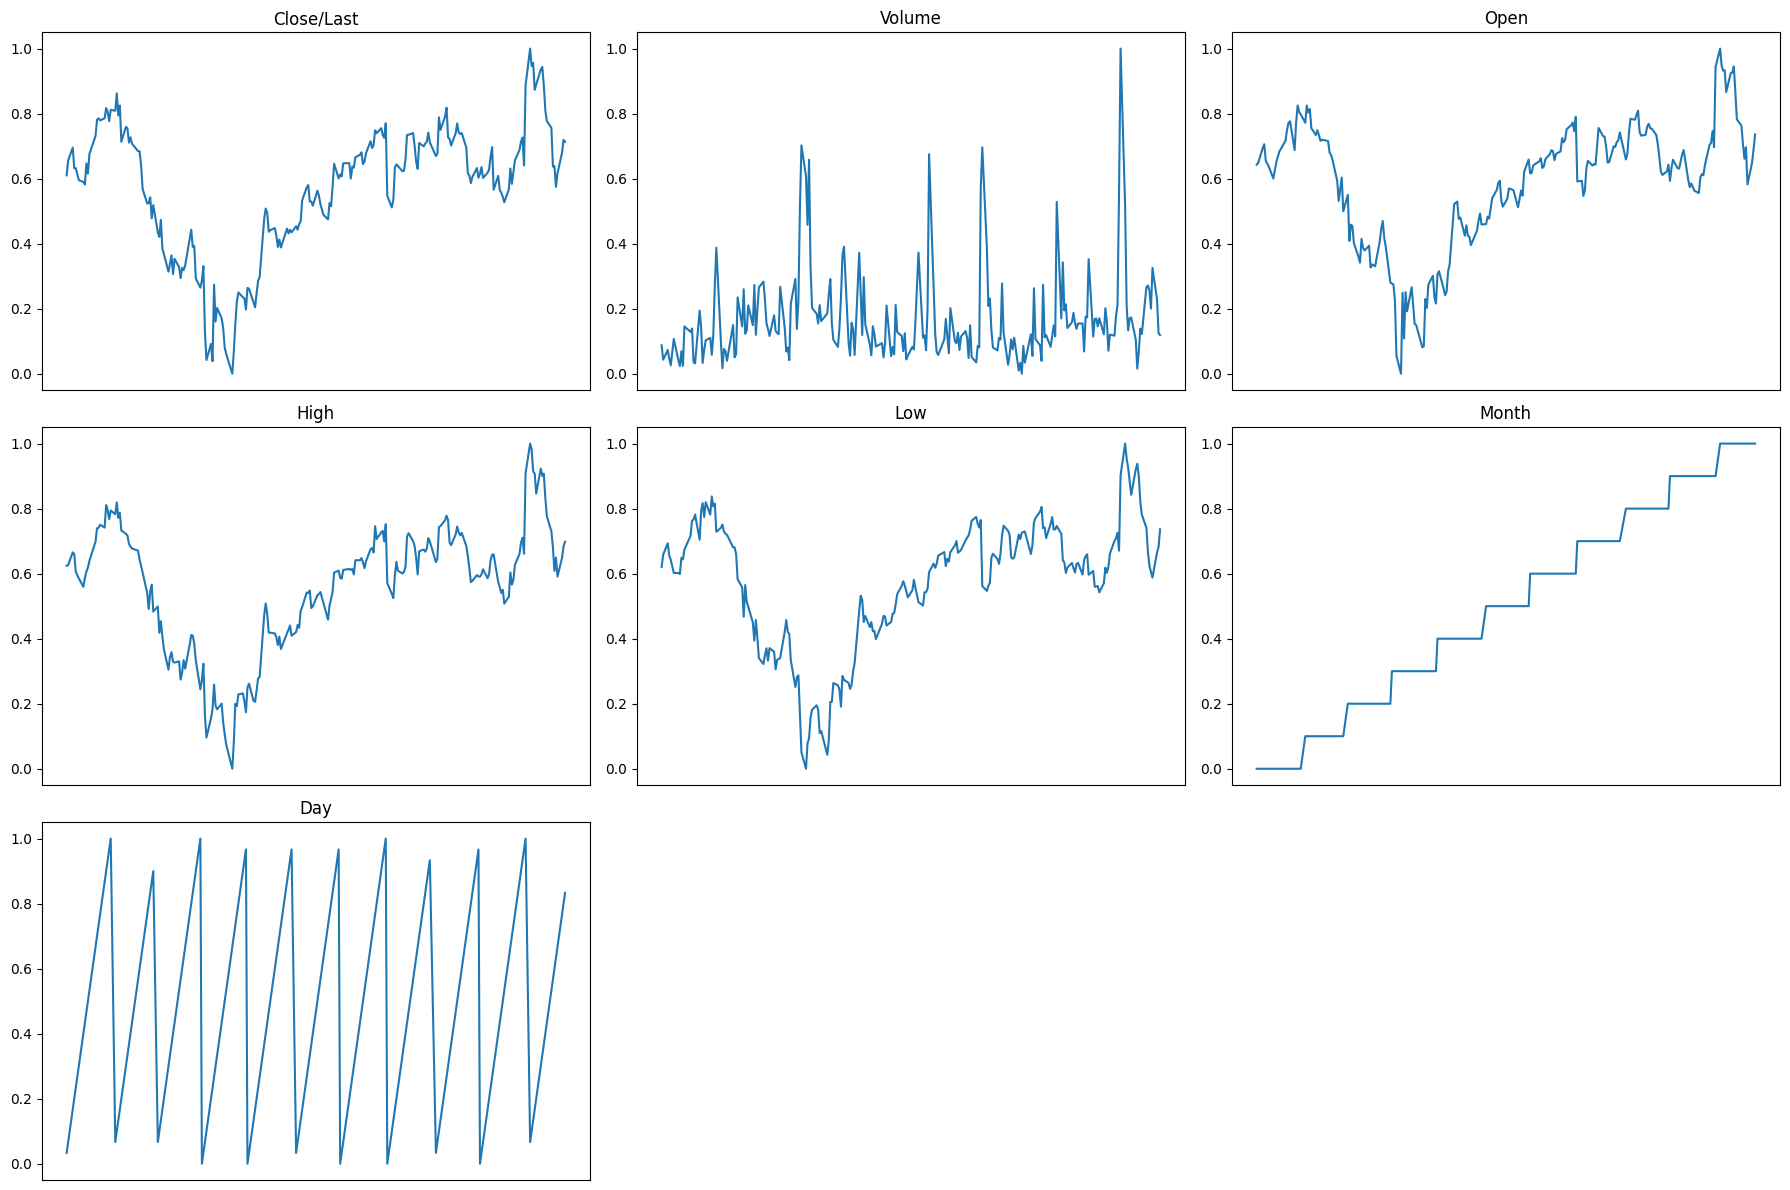

In [32]:
#plotting columns with better spacing
figure, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 12)) # Create a 3x3 grid for 7 columns
ax = ax.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(dataset_scaled.columns):
    ax[i].plot(dataset_scaled[col])
    ax[i].set_title(col)
    ax[i].axes.get_xaxis().set_visible(False)

# Hide any unused subplots
for j in range(len(dataset_scaled.columns), len(ax)):
    figure.delaxes(ax[j])

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()

In [33]:
## creating the sliding window sequence

def create_sequences(data,window_size):
    x = []
    y = []
    for i in range(window_size, len(data)):
        x.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(x),np.array(y)

In [34]:
window_size=50
x, y = create_sequences(dataset_scaled, 30)

In [35]:
x.shape, y.shape

((197, 30, 7), (197, 7))

In [36]:
x

array([[[0.61029072, 0.08754857, 0.64299486, ..., 0.62073864,
         0.        , 0.03333333],
        [0.65609137, 0.04315452, 0.64808269, ..., 0.65821678,
         0.        , 0.06666667],
        [0.69554684, 0.07302791, 0.69387318, ..., 0.69340035,
         0.        , 0.16666667],
        ...,
        [0.71077527, 0.07602902, 0.73329049, ..., 0.72967657,
         0.1       , 0.36666667],
        [0.72738809, 0.0695588 , 0.71604542, ..., 0.72268357,
         0.1       , 0.4       ],
        [0.70789109, 0.03981492, 0.71979434, ..., 0.71951486,
         0.1       , 0.43333333]],

       [[0.65609137, 0.04315452, 0.64808269, ..., 0.65821678,
         0.        , 0.06666667],
        [0.69554684, 0.07302791, 0.69387318, ..., 0.69340035,
         0.        , 0.16666667],
        [0.63209506, 0.04707322, 0.70586975, ..., 0.65646853,
         0.        , 0.2       ],
        ...,
        [0.72738809, 0.0695588 , 0.71604542, ..., 0.72268357,
         0.1       , 0.4       ],
        [0.7

In [37]:
y

array([[0.68447162, 0.14970846, 0.71572408, ..., 0.68116259, 0.1       ,
        0.56666667],
       [0.68424089, 0.05039917, 0.68037704, ..., 0.68105332, 0.1       ,
        0.6       ],
       [0.64097831, 0.06028956, 0.67239717, ..., 0.66029283, 0.1       ,
        0.63333333],
       ...,
       [0.68020305, 0.22789137, 0.64861825, ..., 0.66531906, 1.        ,
        0.76666667],
       [0.71931241, 0.12492467, 0.68958869, ..., 0.68203671, 1.        ,
        0.8       ],
       [0.7134287 , 0.11884952, 0.73628963, ..., 0.73634178, 1.        ,
        0.83333333]])

In [38]:
#train, test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape,


((157, 30, 7), (40, 30, 7))

In [39]:
x_train.shape[1], x_train.shape[1]

(30, 30)

In [40]:
## lstm models
model= keras.Sequential([
    #adding firsr  lstm layers
    keras.layers.LSTM(units=52, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    keras.layers.Dropout(0.3),
    #adding second lstm layers
    keras.layers.LSTM(units=52, return_sequences=True),
    keras.layers.Dropout(0.3),
    #adding third lstm layers
    keras.layers.LSTM(units=52, return_sequences=False),
    keras.layers.Dropout(0.3),
    #adding output layers
    keras.layers.Dense(y_train.shape[1])



])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
#compilation
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['RootMeanSquaredError'])

In [43]:
#early stopping condition
early_stopping=EarlyStopping(monitor='val_loss',
                             patience=10,
                             restore_best_weights=True)


In [44]:
prediction = model.fit(x_train, y_train, epochs=100, batch_size=3, validation_split=0.3, callbacks=[early_stopping])

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - RootMeanSquaredError: 0.3833 - loss: 0.1519 - val_RootMeanSquaredError: 0.1718 - val_loss: 0.0295
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - RootMeanSquaredError: 0.2278 - loss: 0.0519 - val_RootMeanSquaredError: 0.1651 - val_loss: 0.0272
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - RootMeanSquaredError: 0.2260 - loss: 0.0513 - val_RootMeanSquaredError: 0.1498 - val_loss: 0.0225
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - RootMeanSquaredError: 0.1936 - loss: 0.0375 - val_RootMeanSquaredError: 0.1559 - val_loss: 0.0243
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - RootMeanSquaredError: 0.1969 - loss: 0.0389 - val_RootMeanSquaredError: 0.1743 - val_loss: 0.0304
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - RootMeanSquaredError: 0.1906 - loss: 0.0365 - val_RootMeanSquaredError: 0.1520 - val_loss: 0.0231
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - RootMeanSquaredError: 0.1880 - los

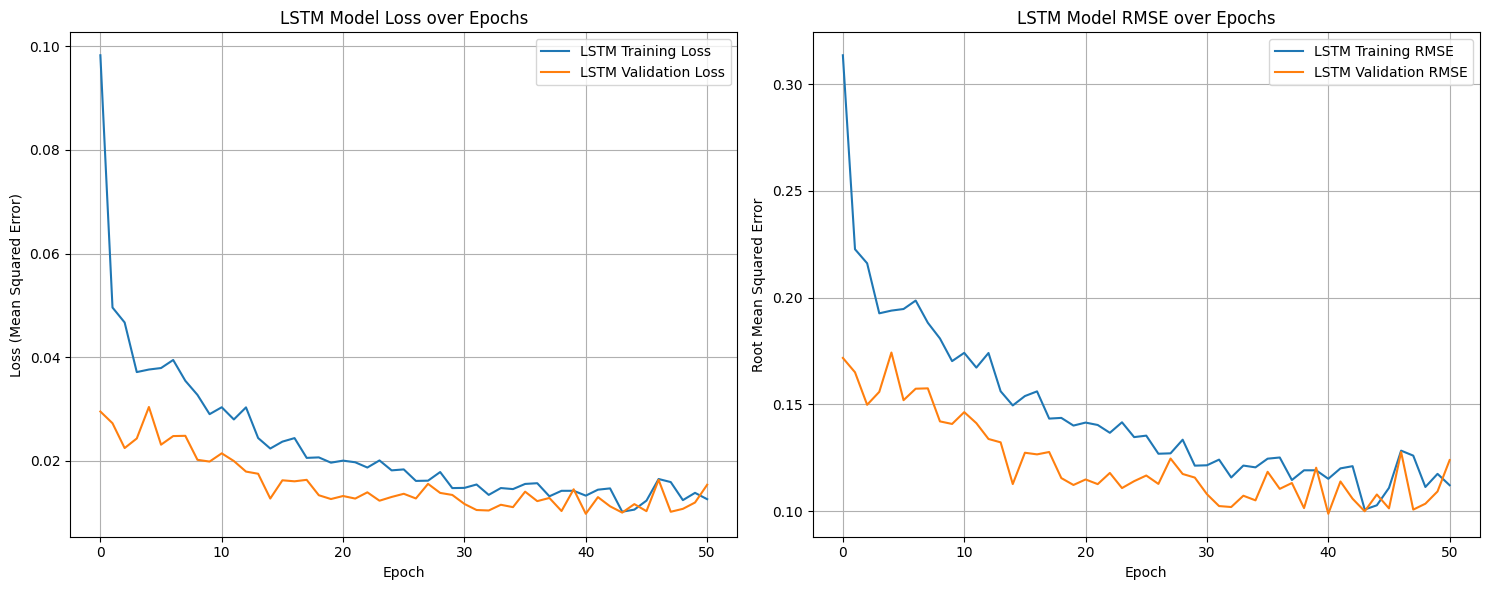

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - RootMeanSquaredError: 0.3043 - loss: 0.0976 - val_RootMeanSquaredError: 0.1590 - val_loss: 0.0253
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - RootMeanSquaredError: 0.1904 - loss: 0.0364 - val_RootMeanSquaredError: 0.1495 - val_loss: 0.0223
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - RootMeanSquaredError: 0.1818 - loss: 0.0331 - val_RootMeanSquaredError: 0.1467 - val_loss: 0.0215
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - RootMeanSquaredError: 0.1632 - loss: 0.0267 - val_RootMeanSquaredError: 0.1392 - val_loss: 0.0194
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - RootMeanSquaredError: 0.1492 - loss: 0.0224 - val_RootMeanSquaredError: 0.1218 - val_loss: 0.0148
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - RootMeanSquaredError: 0.1494 - loss: 0.0224 - val_RootMeanSquaredError: 0.1172 - val_loss: 0.0137
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - RootMeanSquaredError: 0.1450 - 

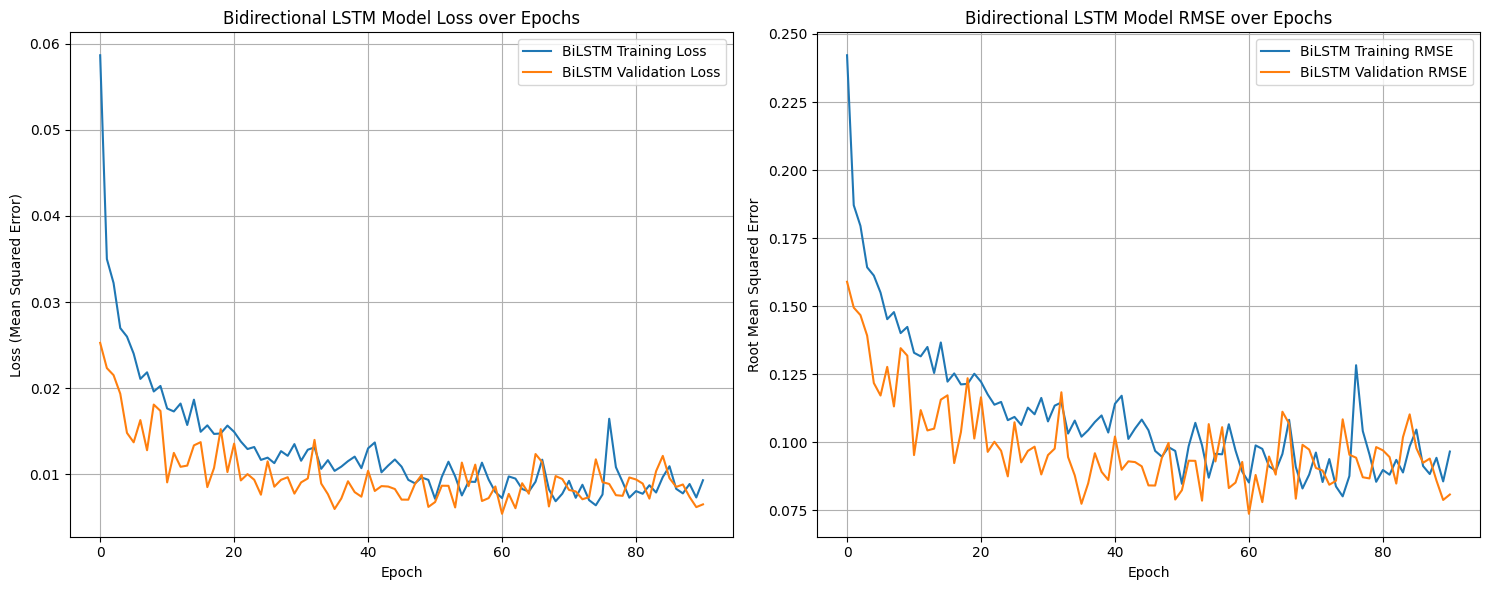

In [47]:
import matplotlib.pyplot as plt

# Plotting training history for LSTM model
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(prediction.history['loss'], label='LSTM Training Loss')
plt.plot(prediction.history['val_loss'], label='LSTM Validation Loss')
plt.title('LSTM Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(prediction.history['RootMeanSquaredError'], label='LSTM Training RMSE')
plt.plot(prediction.history['val_RootMeanSquaredError'], label='LSTM Validation RMSE')
plt.title('LSTM Model RMSE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Ensure Bidirectional LSTM model is trained before plotting its history
# (Copied from cell cXz8nFFdYnuk to ensure history_bilstm is defined)
model_bilstm = Sequential([
    Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(x_train.shape[1], x_train.shape[2])),
    Dropout(0.3),
    Bidirectional(LSTM(units=50, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(units=50, return_sequences=False)),
    Dropout(0.3),
    Dense(y_train.shape[1])
])

model_bilstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['RootMeanSquaredError'])
early_stopping_bilstm = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
history_bilstm = model_bilstm.fit(x_train, y_train, epochs=100, batch_size=2, validation_split=0.2, callbacks=[early_stopping_bilstm])

# Plotting training history for Bidirectional LSTM model
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['loss'], label='BiLSTM Training Loss')
plt.plot(history_bilstm.history['val_loss'], label='BiLSTM Validation Loss')
plt.title('Bidirectional LSTM Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['RootMeanSquaredError'], label='BiLSTM Training RMSE')
plt.plot(history_bilstm.history['val_RootMeanSquaredError'], label='BiLSTM Validation RMSE')
plt.title('Bidirectional LSTM Model RMSE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [48]:
predictions=model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [49]:
prediction.history

{'RootMeanSquaredError': [0.31351032853126526,
  0.22267432510852814,
  0.21609710156917572,
  0.19266913831233978,
  0.1939445585012436,
  0.19468650221824646,
  0.19864070415496826,
  0.1882612705230713,
  0.1808881312608719,
  0.1702878624200821,
  0.17415815591812134,
  0.16725821793079376,
  0.17409251630306244,
  0.1561734676361084,
  0.14954136312007904,
  0.15392650663852692,
  0.15612289309501648,
  0.14337433874607086,
  0.14370456337928772,
  0.14011161029338837,
  0.14150826632976532,
  0.14038456976413727,
  0.13672438263893127,
  0.14164653420448303,
  0.13470670580863953,
  0.13539433479309082,
  0.12692046165466309,
  0.12710724771022797,
  0.13349184393882751,
  0.12134245038032532,
  0.12151294946670532,
  0.12416508793830872,
  0.11580793559551239,
  0.1213790625333786,
  0.12054356187582016,
  0.12460634857416153,
  0.12516404688358307,
  0.11461511254310608,
  0.1191643700003624,
  0.11916040629148483,
  0.11517997831106186,
  0.12006253749132156,
  0.1210987418889

In [50]:
##forecasting the data

predictions[:10]



array([[0.7063564 , 0.12240329, 0.7459258 , 0.7048592 , 0.71508515,
        0.763932  , 0.24817067],
       [0.67047465, 0.16605765, 0.71217716, 0.67579865, 0.66669446,
        0.6654992 , 0.2920962 ],
       [0.3914937 , 0.16546994, 0.42258173, 0.3971626 , 0.35213965,
        0.22846319, 0.31214353],
       [0.51603353, 0.20224527, 0.55112123, 0.5218273 , 0.51104486,
        0.5440944 , 0.2045305 ],
       [0.73817503, 0.26340303, 0.7493508 , 0.7310483 , 0.7336501 ,
        0.7936884 , 0.74657845],
       [0.74800134, 0.16978168, 0.79309094, 0.75550944, 0.76782715,
        0.9502471 , 0.3320232 ],
       [0.5261353 , 0.164783  , 0.5523244 , 0.50027573, 0.5357661 ,
        0.45403147, 0.87044764],
       [0.31345662, 0.29298073, 0.33597285, 0.3212649 , 0.30626112,
        0.470272  , 0.12945536],
       [0.38587412, 0.14858474, 0.41845447, 0.38938594, 0.3571447 ,
        0.21002166, 0.42337644],
       [0.6127819 , 0.19771472, 0.6395714 , 0.62399924, 0.6224526 ,
        0.8959228 , 0.5

In [51]:
###inverse scaling


predictions_inverse = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

In [52]:
predictions[:10]

array([[0.7063564 , 0.12240329, 0.7459258 , 0.7048592 , 0.71508515,
        0.763932  , 0.24817067],
       [0.67047465, 0.16605765, 0.71217716, 0.67579865, 0.66669446,
        0.6654992 , 0.2920962 ],
       [0.3914937 , 0.16546994, 0.42258173, 0.3971626 , 0.35213965,
        0.22846319, 0.31214353],
       [0.51603353, 0.20224527, 0.55112123, 0.5218273 , 0.51104486,
        0.5440944 , 0.2045305 ],
       [0.73817503, 0.26340303, 0.7493508 , 0.7310483 , 0.7336501 ,
        0.7936884 , 0.74657845],
       [0.74800134, 0.16978168, 0.79309094, 0.75550944, 0.76782715,
        0.9502471 , 0.3320232 ],
       [0.5261353 , 0.164783  , 0.5523244 , 0.50027573, 0.5357661 ,
        0.45403147, 0.87044764],
       [0.31345662, 0.29298073, 0.33597285, 0.3212649 , 0.30626112,
        0.470272  , 0.12945536],
       [0.38587412, 0.14858474, 0.41845447, 0.38938594, 0.3571447 ,
        0.21002166, 0.42337644],
       [0.6127819 , 0.19771472, 0.6395714 , 0.62399924, 0.6224526 ,
        0.8959228 , 0.5

ValueError: num must be an integer with 1 <= num <= 6, not 0

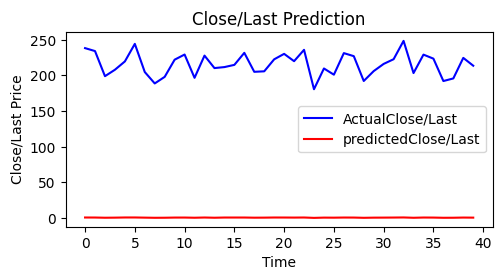

In [57]:
##3plotting the results

plt.figure(figsize=(14,5))
for i, col in enumerate(dataset_scaled.columns):
  plt.subplot(2,3, 1-i)
  plt.plot(y_test_rescaled[:,i], color='blue', label = f'Actual{col}')
  plt.plot(predictions[:, i], color='red', label= f'predicted{col}')
  plt.title(f'{col} Prediction')
  plt.xlabel('Time')
  plt.ylabel(f'{col} Price')
  plt.legend()
  plt.tight_layout()
plt.show()

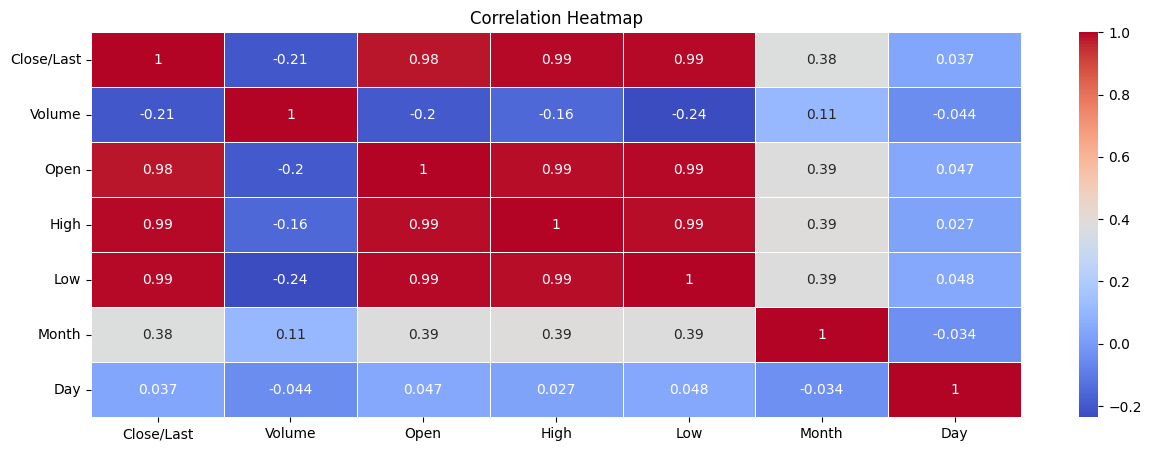

In [58]:
#  correlation matrix
corr = dataset.corr(numeric_only=True)

#  heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

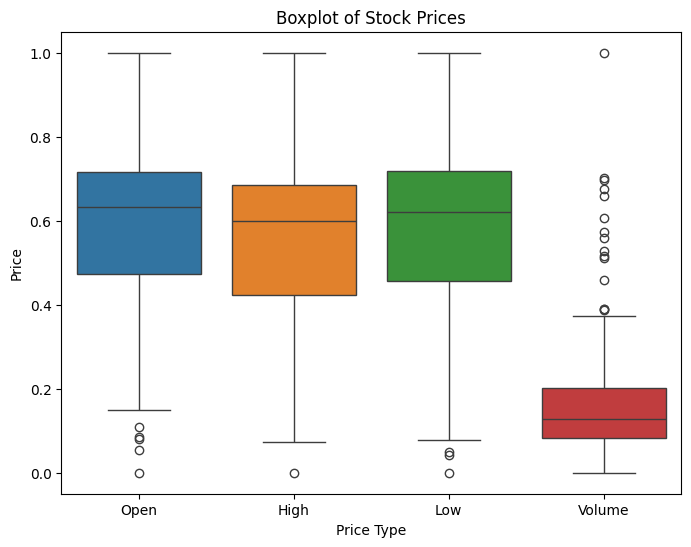

In [59]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset[['Open', 'High', 'Low', 'Volume']])
plt.title('Boxplot of Stock Prices')
plt.ylabel('Price')
plt.xlabel('Price Type')
plt.show()

In [60]:
## Bidirectional LSTM model
model_bilstm = Sequential([
    Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(x_train.shape[1], x_train.shape[2])),
    Dropout(0.3),
    Bidirectional(LSTM(units=50, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(units=50, return_sequences=False)),
    Dropout(0.3),
    Dense(y_train.shape[1])
])

# Compilation
model_bilstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['RootMeanSquaredError'])

# Early stopping
early_stopping_bilstm = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training
history_bilstm = model_bilstm.fit(x_train, y_train, epochs=100, batch_size=2, validation_split=0.2, callbacks=[early_stopping_bilstm])

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 168ms/step - RootMeanSquaredError: 0.2784 - loss: 0.0790 - val_RootMeanSquaredError: 0.1446 - val_loss: 0.0209
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - RootMeanSquaredError: 0.1846 - loss: 0.0342 - val_RootMeanSquaredError: 0.1462 - val_loss: 0.0214
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - RootMeanSquaredError: 0.1898 - loss: 0.0361 - val_RootMeanSquaredError: 0.1379 - val_loss: 0.0190
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - RootMeanSquaredError: 0.1581 - loss: 0.0254 - val_RootMeanSquaredError: 0.1301 - val_loss: 0.0169
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - RootMeanSquaredError: 0.1580 - loss: 0.0250 - val_RootMeanSquaredError: 0.1274 - val_loss: 0.0162
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - RootMeanSquaredError: 0.1420 - loss: 0.0203 - val_RootMeanSquaredError: 0.1167 - val_loss: 0.0136
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - RootMeanSquaredError: 0.1318 - loss: 0.0174

In [61]:
# Evaluate LSTM model
lstm_evaluation = model.evaluate(x_test, y_test, verbose=0)
lstm_rmse = lstm_evaluation[1]  # Assuming RootMeanSquaredError is the second metric
print(f"LSTM Model RMSE: {lstm_rmse:.4f}")

# Evaluate Bidirectional LSTM model
bilstm_evaluation = model_bilstm.evaluate(x_test, y_test, verbose=0)
bilstm_rmse = bilstm_evaluation[1]  # Assuming RootMeanSquaredError is the second metric
print(f"Bidirectional LSTM Model RMSE: {bilstm_rmse:.4f}")

LSTM Model RMSE: 0.1077
Bidirectional LSTM Model RMSE: 0.1145


In [63]:
def build_gru():
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=(seq_length,1)),
        Dropout(0.2),
        GRU(32),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model